### **Calculando desvios padrao por métricas** 

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import os

# Lista de arquivos de resultados 

base_path = r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\notebooks\summary_results_effnet"

fold_files = [
    os.path.join(base_path, "0618-231213_EFF-NET_fold0_results.csv"),
    os.path.join(base_path, "0618-231213_EFF-NET_fold1_results.csv"),
    os.path.join(base_path, "0618-231213_EFF-NET_fold2_results.csv"),
    os.path.join(base_path, "0618-231213_EFF-NET_fold3_results.csv"),
    os.path.join(base_path, "0618-231213_EFF-NET_fold4_results.csv"),
    os.path.join(base_path, "0618-231213_EFF-NET_fold5_results.csv"),
    os.path.join(base_path, "0618-231213_EFF-NET_fold6_results.csv"),
    os.path.join(base_path, "0618-231213_EFF-NET_fold7_results.csv"),
    os.path.join(base_path, "0618-231213_EFF-NET_fold8_results.csv"),
    os.path.join(base_path, "0618-231213_EFF-NET_fold9_results.csv")
]

# Classes
classes = ['cin', 'ebv', 'msi', 'gs']

# Listas para armazenar métricas de cada fold
all_precision = []
all_recall = []
all_f1 = []
all_accuracy = []


In [39]:

# Processar cada fold
for file in fold_files:
    # Carregar dados do fold
    df = pd.read_csv(file)
    
    # Extrair rótulos verdadeiros e preditos
    y_true = df['true_label']
    y_pred = df['predicted_label']
    
    # Calcular métricas para este fold
    precision = precision_score(y_true, y_pred, labels=classes, average=None, zero_division=0)
    recall = recall_score(y_true, y_pred, labels=classes, average=None, zero_division=0)
    f1 = f1_score(y_true, y_pred, labels=classes, average=None, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    
    # Armazenar métricas
    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)
    all_accuracy.append(accuracy)

# Converter para arrays numpy para facilitar cálculos estatísticos
all_precision = np.array(all_precision)
all_recall = np.array(all_recall)
all_f1 = np.array(all_f1)
all_accuracy = np.array(all_accuracy)

# Calcular médias e desvios padrão
mean_precision = np.mean(all_precision, axis=0)
std_precision = np.std(all_precision, axis=0)

mean_recall = np.mean(all_recall, axis=0)
std_recall = np.std(all_recall, axis=0)

mean_f1 = np.mean(all_f1, axis=0)
std_f1 = np.std(all_f1, axis=0)

mean_accuracy = np.mean(all_accuracy)
std_accuracy = np.std(all_accuracy)

# Exibir resultados
print("=== RESULTADOS POR CLASSE ===")
for i, cls in enumerate(classes):
    print(f"\nClasse: {cls.upper()}")
    print(f"Precision: {mean_precision[i]:.4f} ± {std_precision[i]:.4f}")
    print(f"Recall:    {mean_recall[i]:.4f} ± {std_recall[i]:.4f}")
    print(f"F1-Score:  {mean_f1[i]:.4f} ± {std_f1[i]:.4f}")

print("\n=== RESULTADOS GLOBAIS ===")
print(f"Acurácia: {mean_accuracy:.4f} ± {std_accuracy:.4f}")

# Calcular também métricas médias (macro average)
print("\n=== MÉDIAS MACRO ===")
print(f"Precision (macro): {np.mean(mean_precision):.4f} ± {np.mean(std_precision):.4f}")
print(f"Recall (macro):    {np.mean(mean_recall):.4f} ± {np.mean(std_recall):.4f}")
print(f"F1-Score (macro):  {np.mean(mean_f1):.4f} ± {np.mean(std_f1):.4f}")

# Criar DataFrame com resultados para exportação se necessário
results_df = pd.DataFrame({
    'Classe': classes,
    'Precision_Mean': mean_precision,
    'Precision_Std': std_precision,
    'Recall_Mean': mean_recall,
    'Recall_Std': std_recall,
    'F1_Mean': mean_f1,
    'F1_Std': std_f1
})

# Salvar resultados em CSV
results_df.to_csv('metricas_com_desvio_padrao.csv', index=False)
print("\nResultados salvos em 'metricas_com_desvio_padrao.csv'")

=== RESULTADOS POR CLASSE ===

Classe: CIN
Precision: 0.5479 ± 0.0474
Recall:    0.5968 ± 0.1063
F1-Score:  0.5632 ± 0.0386

Classe: EBV
Precision: 0.0858 ± 0.0373
Recall:    0.0959 ± 0.0789
F1-Score:  0.0822 ± 0.0528

Classe: MSI
Precision: 0.4099 ± 0.0747
Recall:    0.3740 ± 0.1669
F1-Score:  0.3642 ± 0.0815

Classe: GS
Precision: 0.1647 ± 0.0422
Recall:    0.1306 ± 0.1137
F1-Score:  0.1276 ± 0.0659

=== RESULTADOS GLOBAIS ===
Acurácia: 0.4014 ± 0.0237

=== MÉDIAS MACRO ===
Precision (macro): 0.3021 ± 0.0504
Recall (macro):    0.2993 ± 0.1164
F1-Score (macro):  0.2843 ± 0.0597

Resultados salvos em 'metricas_com_desvio_padrao.csv'


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import ast

def plot_roc_curves(data, format_type='multi_file', models=None, classes=None):
    """
    Plota curvas ROC para ambos os formatos de tabela (múltiplos arquivos ou único arquivo com múltiplos modelos)
    
    Parâmetros:
    -----------
    data : list ou DataFrame
        - Para format_type='multi_file': Lista de DataFrames (um para cada fold)
        - Para format_type='single_file': DataFrame único com todas as predições
    format_type : str
        'multi_file' para múltiplos arquivos, 'single_file' para arquivo único com múltiplos modelos
    models : list, opcional
        Lista de nomes de modelos (ex: ['m0', 'm1', ..., 'm9']). Necessário apenas para single_file
    classes : list, opcional
        Lista de classes. Se None, será inferida dos dados
    """
    
    # Configurações do plot
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
    
    # Para o formato de múltiplos arquivos
    if format_type == 'multi_file':
        if classes is None:
            # Inferir classes do primeiro DataFrame
            classes = data[0]['true_label'].unique()
        
        # Binarizar os rótulos verdadeiros
        y_test = label_binarize(data[0]['true_label'], classes=classes)
        n_classes = y_test.shape[1]
        
        # Calcular ROC para cada fold
        mean_fpr = np.linspace(0, 1, 100)
        tprs = []
        aucs = []
        
        for i, df in enumerate(data):
            # Extrair probabilidades
            prob_vectors = df['probability_vector'].apply(ast.literal_eval)
            y_score = np.array([list(prob_vec.values()) for prob_vec in prob_vectors])
            
            # Calcular curva ROC para cada classe
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            
            for j in range(n_classes):
                fpr[j], tpr[j], _ = roc_curve(y_test[:, j], y_score[:, j])
                roc_auc[j] = auc(fpr[j], tpr[j])
                
                # Interpolar para ter o mesmo número de pontos
                interp_tpr = np.interp(mean_fpr, fpr[j], tpr[j])
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                aucs.append(roc_auc[j])
                
                # Plotar curva ROC para este fold e classe
                color = next(colors)
                plt.plot(fpr[j], tpr[j], color=color, alpha=0.3, lw=1, 
                         label=f'ROC fold {i} (class {classes[j]}) (AUC = {roc_auc[j]:.2f})' if i == 0 else "")
        
        # Calcular média e desvio padrão
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        
        # Plotar curva ROC média
        plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2, alpha=.8)
        
        # Adicionar intervalo de confiança
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='± 1 std. dev.')
    
    # Para o formato de arquivo único com múltiplos modelos
    elif format_type == 'single_file':
        if models is None:
            # Tentar inferir modelos das colunas
            models = [col.split('_')[-1] for col in data.columns if 'predicted_label_' in col]
            models = sorted(set(models))
        
        if classes is None:
            # Inferir classes da coluna true_label
            classes = data['true_label'].unique()
        
        # Binarizar os rótulos verdadeiros
        y_test = label_binarize(data['true_label'], classes=classes)
        n_classes = y_test.shape[1]
        
        # Calcular ROC para cada modelo
        mean_fpr = np.linspace(0, 1, 100)
        tprs = []
        aucs = []
        
        for model in models:
            # Extrair probabilidades para este modelo
            prob_vectors = data[f'probability_vector_{model}'].apply(ast.literal_eval)
            y_score = np.array([list(prob_vec.values()) for prob_vec in prob_vectors])
            
            # Calcular curva ROC para cada classe
            for j in range(n_classes):
                fpr, tpr, _ = roc_curve(y_test[:, j], y_score[:, j])
                roc_auc = auc(fpr, tpr)
                
                # Interpolar para ter o mesmo número de pontos
                interp_tpr = np.interp(mean_fpr, fpr, tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                aucs.append(roc_auc)
                
                # Plotar curva ROC para este modelo e classe
                color = next(colors)
                plt.plot(fpr, tpr, color=color, alpha=0.3, lw=1, 
                         label=f'ROC {model} (class {classes[j]}) (AUC = {roc_auc:.2f})' if model == models[0] else "")
        
        # Calcular média e desvio padrão
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        
        # Plotar curva ROC média
        plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})', lw=2, alpha=.8)
        
        # Adicionar intervalo de confiança
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='± 1 std. dev.')
    
    else:
        raise ValueError("format_type deve ser 'multi_file' ou 'single_file'")
    
    # Configurações finais do plot
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right", fontsize='small')
    plt.grid(True)
    plt.show()

# Exemplo de uso para o primeiro formato (múltiplos arquivos)
def load_multiple_files(file_paths):
    """Carrega múltiplos arquivos CSV e retorna uma lista de DataFrames"""
    dataframes = []
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dataframes.append(df)
    return dataframes

# Exemplo de uso para o segundo formato (arquivo único)
def load_single_file(file_path):
    """Carrega um único arquivo CSV com múltiplos modelos"""
    return pd.read_csv(file_path)


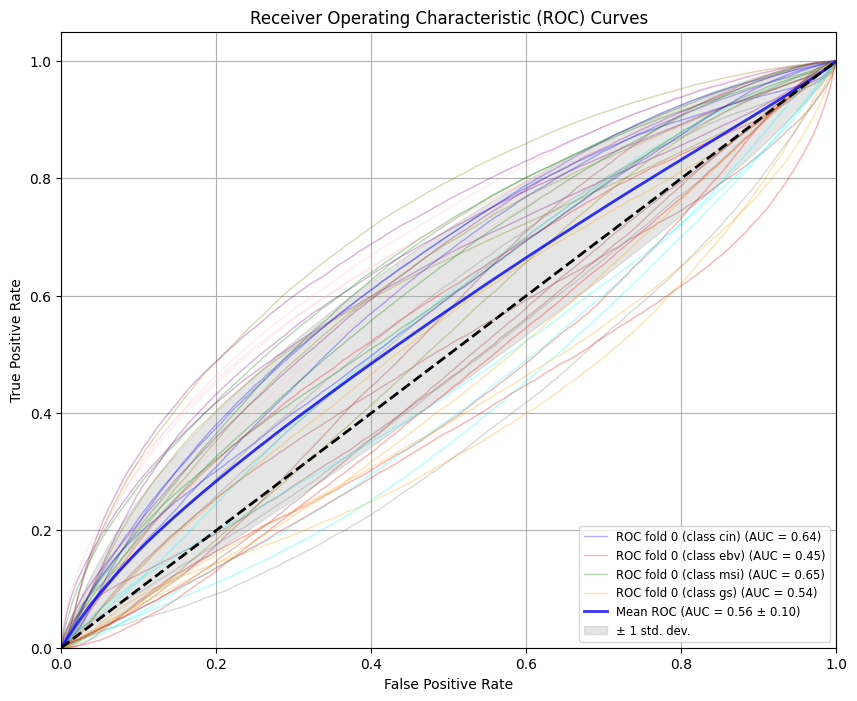

In [41]:

# Exemplo de uso:
# Para múltiplos arquivos:
data = load_multiple_files(fold_files)
plot_roc_curves(data, format_type='multi_file', classes=['cin', 'ebv', 'msi', 'gs'])


## **Para o modelo SA (MOB)**

In [42]:
mob_table = pd.read_csv(r"C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\merged_table_mob.csv")

In [43]:
mob_table

,Unnamed: 0,image_path,true_label,true_label_one_hot,predicted_label_m0,predicted_probability_m0,probability_vector_m0,probability_std_dev_m0,predicted_label_m1,predicted_probability_m1,...,probability_vector_m7,probability_std_dev_m7,predicted_label_m8,predicted_probability_m8,probability_vector_m8,probability_std_dev_m8,predicted_label_m9,predicted_probability_m9,probability_vector_m9,probability_std_dev_m9
0,0,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",gs,0.756231,"{'cin': 0.2045, 'ebv': 0.0067, 'gs': 0.7562, '...",0.301999,msi,0.675514,...,"{'cin': 0.345, 'ebv': 0.055, 'gs': 0.2001, 'ms...",0.134193,cin,0.515215,"{'cin': 0.5152, 'ebv': 0.0972, 'gs': 0.3666, '...",0.199850,cin,0.505040,"{'cin': 0.505, 'ebv': 0.1166, 'gs': 0.0293, 'm...",0.187996
1,1,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.874059,"{'cin': 0.8741, 'ebv': 0.0256, 'gs': 0.0251, '...",0.360876,msi,0.387466,...,"{'cin': 0.1852, 'ebv': 0.219, 'gs': 0.5493, 'm...",0.184498,cin,0.637248,"{'cin': 0.6372, 'ebv': 0.0942, 'gs': 0.2198, '...",0.232183,cin,0.849860,"{'cin': 0.8499, 'ebv': 0.0377, 'gs': 0.0088, '...",0.348027
2,2,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.798640,"{'cin': 0.7986, 'ebv': 0.0168, 'gs': 0.1421, '...",0.320198,gs,0.459887,...,"{'cin': 0.4112, 'ebv': 0.1506, 'gs': 0.3831, '...",0.151348,cin,0.709619,"{'cin': 0.7096, 'ebv': 0.1531, 'gs': 0.0826, '...",0.267775,cin,0.889402,"{'cin': 0.8894, 'ebv': 0.0178, 'gs': 0.0255, '...",0.369640
3,3,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.963005,"{'cin': 0.963, 'ebv': 0.0104, 'gs': 0.0104, 'm...",0.411660,msi,0.543819,...,"{'cin': 0.3196, 'ebv': 0.0347, 'gs': 0.2483, '...",0.135031,cin,0.780659,"{'cin': 0.7807, 'ebv': 0.0342, 'gs': 0.082, 'm...",0.307389,cin,0.899980,"{'cin': 0.9, 'ebv': 0.0194, 'gs': 0.0124, 'msi...",0.375881
4,4,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.882274,"{'cin': 0.8823, 'ebv': 0.0139, 'gs': 0.0771, '...",0.365807,cin,0.516469,...,"{'cin': 0.6057, 'ebv': 0.139, 'gs': 0.0365, 'm...",0.215270,gs,0.739183,"{'cin': 0.1717, 'ebv': 0.066, 'gs': 0.7392, 'm...",0.287553,cin,0.847746,"{'cin': 0.8477, 'ebv': 0.0591, 'gs': 0.0096, '...",0.346134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179947,179947,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.873058,"{'cin': 0.8731, 'ebv': 0.034, 'gs': 0.0154, 'm...",0.360431,msi,0.720836,...,"{'cin': 0.9024, 'ebv': 0.0228, 'gs': 0.017, 'm...",0.377002,ebv,0.472035,"{'cin': 0.3223, 'ebv': 0.472, 'gs': 0.0221, 'm...",0.166497,cin,0.453449,"{'cin': 0.4534, 'ebv': 0.1811, 'gs': 0.0486, '...",0.150978
179948,179948,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.615133,"{'cin': 0.6151, 'ebv': 0.0227, 'gs': 0.1079, '...",0.226496,msi,0.847759,...,"{'cin': 0.7283, 'ebv': 0.0086, 'gs': 0.0582, '...",0.285437,msi,0.498057,"{'cin': 0.3107, 'ebv': 0.1392, 'gs': 0.0521, '...",0.170782,cin,0.572329,"{'cin': 0.5723, 'ebv': 0.0986, 'gs': 0.1253, '...",0.190076
179949,179949,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.684742,"{'cin': 0.6847, 'ebv': 0.0186, 'gs': 0.0217, '...",0.271704,msi,0.820183,...,"{'cin': 0.957, 'ebv': 0.0029, 'gs': 0.0027, 'm...",0.408457,msi,0.606664,"{'cin': 0.1943, 'ebv': 0.1798, 'gs': 0.0193, '...",0.217072,ebv,0.769854,"{'cin': 0.1306, 'ebv': 0.7699, 'gs': 0.0079, '...",0.303393
179950,179950,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.896583,"{'cin': 0.8966, 'ebv': 0.0069, 'gs': 0.0051, '...",0.374930,msi,0.857981,...,"{'cin': 0.531, 'ebv': 0.0337, 'gs': 0.0207, 'm...",0.226648,ebv,0.564254,"{'cin': 0.3466, 'ebv': 0.5643, 'gs': 0.0173, '...",0.220205,ebv,0.506749,"{'cin': 0.2322, 'ebv': 0.5067, 'gs': 0.0357, '...",0.167914


In [44]:
# excluir coluna unnamed 0
mob_table = mob_table.drop(columns=["Unnamed: 0"], errors='ignore')



In [45]:
mob_table

,image_path,true_label,true_label_one_hot,predicted_label_m0,predicted_probability_m0,probability_vector_m0,probability_std_dev_m0,predicted_label_m1,predicted_probability_m1,probability_vector_m1,...,probability_vector_m7,probability_std_dev_m7,predicted_label_m8,predicted_probability_m8,probability_vector_m8,probability_std_dev_m8,predicted_label_m9,predicted_probability_m9,probability_vector_m9,probability_std_dev_m9
0,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",gs,0.756231,"{'cin': 0.2045, 'ebv': 0.0067, 'gs': 0.7562, '...",0.301999,msi,0.675514,"{'cin': 0.2304, 'ebv': 0.0432, 'gs': 0.0509, '...",...,"{'cin': 0.345, 'ebv': 0.055, 'gs': 0.2001, 'ms...",0.134193,cin,0.515215,"{'cin': 0.5152, 'ebv': 0.0972, 'gs': 0.3666, '...",0.199850,cin,0.505040,"{'cin': 0.505, 'ebv': 0.1166, 'gs': 0.0293, 'm...",0.187996
1,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.874059,"{'cin': 0.8741, 'ebv': 0.0256, 'gs': 0.0251, '...",0.360876,msi,0.387466,"{'cin': 0.354, 'ebv': 0.0301, 'gs': 0.2284, 'm...",...,"{'cin': 0.1852, 'ebv': 0.219, 'gs': 0.5493, 'm...",0.184498,cin,0.637248,"{'cin': 0.6372, 'ebv': 0.0942, 'gs': 0.2198, '...",0.232183,cin,0.849860,"{'cin': 0.8499, 'ebv': 0.0377, 'gs': 0.0088, '...",0.348027
2,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.798640,"{'cin': 0.7986, 'ebv': 0.0168, 'gs': 0.1421, '...",0.320198,gs,0.459887,"{'cin': 0.2525, 'ebv': 0.0268, 'gs': 0.4599, '...",...,"{'cin': 0.4112, 'ebv': 0.1506, 'gs': 0.3831, '...",0.151348,cin,0.709619,"{'cin': 0.7096, 'ebv': 0.1531, 'gs': 0.0826, '...",0.267775,cin,0.889402,"{'cin': 0.8894, 'ebv': 0.0178, 'gs': 0.0255, '...",0.369640
3,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.963005,"{'cin': 0.963, 'ebv': 0.0104, 'gs': 0.0104, 'm...",0.411660,msi,0.543819,"{'cin': 0.2835, 'ebv': 0.0329, 'gs': 0.1398, '...",...,"{'cin': 0.3196, 'ebv': 0.0347, 'gs': 0.2483, '...",0.135031,cin,0.780659,"{'cin': 0.7807, 'ebv': 0.0342, 'gs': 0.082, 'm...",0.307389,cin,0.899980,"{'cin': 0.9, 'ebv': 0.0194, 'gs': 0.0124, 'msi...",0.375881
4,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.882274,"{'cin': 0.8823, 'ebv': 0.0139, 'gs': 0.0771, '...",0.365807,cin,0.516469,"{'cin': 0.5165, 'ebv': 0.0491, 'gs': 0.0927, '...",...,"{'cin': 0.6057, 'ebv': 0.139, 'gs': 0.0365, 'm...",0.215270,gs,0.739183,"{'cin': 0.1717, 'ebv': 0.066, 'gs': 0.7392, 'm...",0.287553,cin,0.847746,"{'cin': 0.8477, 'ebv': 0.0591, 'gs': 0.0096, '...",0.346134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179947,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.873058,"{'cin': 0.8731, 'ebv': 0.034, 'gs': 0.0154, 'm...",0.360431,msi,0.720836,"{'cin': 0.1183, 'ebv': 0.0914, 'gs': 0.0694, '...",...,"{'cin': 0.9024, 'ebv': 0.0228, 'gs': 0.017, 'm...",0.377002,ebv,0.472035,"{'cin': 0.3223, 'ebv': 0.472, 'gs': 0.0221, 'm...",0.166497,cin,0.453449,"{'cin': 0.4534, 'ebv': 0.1811, 'gs': 0.0486, '...",0.150978
179948,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.615133,"{'cin': 0.6151, 'ebv': 0.0227, 'gs': 0.1079, '...",0.226496,msi,0.847759,"{'cin': 0.0305, 'ebv': 0.0353, 'gs': 0.0864, '...",...,"{'cin': 0.7283, 'ebv': 0.0086, 'gs': 0.0582, '...",0.285437,msi,0.498057,"{'cin': 0.3107, 'ebv': 0.1392, 'gs': 0.0521, '...",0.170782,cin,0.572329,"{'cin': 0.5723, 'ebv': 0.0986, 'gs': 0.1253, '...",0.190076
179949,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.684742,"{'cin': 0.6847, 'ebv': 0.0186, 'gs': 0.0217, '...",0.271704,msi,0.820183,"{'cin': 0.099, 'ebv': 0.0315, 'gs': 0.0493, 'm...",...,"{'cin': 0.957, 'ebv': 0.0029, 'gs': 0.0027, 'm...",0.408457,msi,0.606664,"{'cin': 0.1943, 'ebv': 0.1798, 'gs': 0.0193, '...",0.217072,ebv,0.769854,"{'cin': 0.1306, 'ebv': 0.7699, 'gs': 0.0079, '...",0.303393
179950,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.896583,"{'cin':

In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import ast

# Carregar o arquivo CSV
df = pd.read_csv('C:\\Users\\Fernando Alves\\Documents\\WANG PIPELINE\\Wang\\merged_table_mob.csv')

# Classes do problema
classes = ['cin', 'ebv', 'msi', 'gs']

# Listas para armazenar métricas de cada modelo
all_precision = []
all_recall = []
all_f1 = []
all_accuracy = []

# Processar cada modelo (m0 a m9)
for i in range(10):
    model_name = f'm{i}'
    
    # Extrair rótulos verdadeiros e preditos para este modelo
    y_true = df['true_label']
    y_pred = df[f'predicted_label_{model_name}']
    
    # Calcular métricas para este modelo
    precision = precision_score(y_true, y_pred, labels=classes, average=None, zero_division=0)
    recall = recall_score(y_true, y_pred, labels=classes, average=None, zero_division=0)
    f1 = f1_score(y_true, y_pred, labels=classes, average=None, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    
    # Armazenar métricas
    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)
    all_accuracy.append(accuracy)

# Converter para arrays numpy para facilitar cálculos estatísticos
all_precision = np.array(all_precision)
all_recall = np.array(all_recall)
all_f1 = np.array(all_f1)
all_accuracy = np.array(all_accuracy)


In [47]:

# Calcular médias e desvios padrão
mean_precision = np.mean(all_precision, axis=0)
std_precision = np.std(all_precision, axis=0)

mean_recall = np.mean(all_recall, axis=0)
std_recall = np.std(all_recall, axis=0)

mean_f1 = np.mean(all_f1, axis=0)
std_f1 = np.std(all_f1, axis=0)

mean_accuracy = np.mean(all_accuracy)
std_accuracy = np.std(all_accuracy)


In [48]:
# Exibir resultados
print("=== RESULTADOS POR CLASSE ===")
for i, cls in enumerate(classes):
    print(f"\nClasse: {cls.upper()}")
    print(f"Precision: {mean_precision[i]:.4f} ± {std_precision[i]:.4f}")
    print(f"Recall:    {mean_recall[i]:.4f} ± {std_recall[i]:.4f}")
    print(f"F1-Score:  {mean_f1[i]:.4f} ± {std_f1[i]:.4f}")

print("\n=== RESULTADOS GLOBAIS ===")
print(f"Acurácia: {mean_accuracy:.4f} ± {std_accuracy:.4f}")

# Calcular também métricas médias (macro average)
print("\n=== MÉDIAS MACRO ===")
print(f"Precision (macro): {np.mean(mean_precision):.4f} ± {np.mean(std_precision):.4f}")
print(f"Recall (macro):    {np.mean(mean_recall):.4f} ± {np.mean(std_recall):.4f}")
print(f"F1-Score (macro):  {np.mean(mean_f1):.4f} ± {np.mean(std_f1):.4f}")

# Criar DataFrame com resultados para exportação
results_df = pd.DataFrame({
    'Classe': classes,
    'Precision_Mean': mean_precision,
    'Precision_Std': std_precision,
    'Recall_Mean': mean_recall,
    'Recall_Std': std_recall,
    'F1_Mean': mean_f1,
    'F1_Std': std_f1
})

# Salvar resultados em CSV
results_df.to_csv('metricas_com_desvio_padrao_unica_tabela.csv', index=False)
print("\nResultados salvos em 'metricas_com_desvio_padrao_unica_tabela.csv'")


=== RESULTADOS POR CLASSE ===

Classe: CIN
Precision: 0.6203 ± 0.0362
Recall:    0.6429 ± 0.1366
F1-Score:  0.6217 ± 0.0563

Classe: EBV
Precision: 0.4191 ± 0.1303
Recall:    0.2954 ± 0.1189
F1-Score:  0.3232 ± 0.0923

Classe: MSI
Precision: 0.5078 ± 0.0597
Recall:    0.3079 ± 0.1175
F1-Score:  0.3686 ± 0.0663

Classe: GS
Precision: 0.2752 ± 0.0579
Recall:    0.3907 ± 0.1218
F1-Score:  0.3019 ± 0.0511

=== RESULTADOS GLOBAIS ===
Acurácia: 0.4857 ± 0.0504

=== MÉDIAS MACRO ===
Precision (macro): 0.4556 ± 0.0710
Recall (macro):    0.4092 ± 0.1237
F1-Score (macro):  0.4039 ± 0.0665

Resultados salvos em 'metricas_com_desvio_padrao_unica_tabela.csv'


In [49]:

# Análise adicional: Calcular a matriz de confusão média
from sklearn.metrics import confusion_matrix

# Calcular matriz de confusão para cada modelo e depois a média
all_cm = []
for i in range(10):
    model_name = f'm{i}'
    y_true = df['true_label']
    y_pred = df[f'predicted_label_{model_name}']
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    all_cm.append(cm)

# Calcular a matriz de confusão média
mean_cm = np.mean(all_cm, axis=0)

print("\n=== MATRIZ DE CONFUSÃO MÉDIA ===")
print("Linhas: Verdadeiro, Colunas: Previsto")
print(pd.DataFrame(mean_cm, index=classes, columns=classes))


=== MATRIZ DE CONFUSÃO MÉDIA ===
Linhas: Verdadeiro, Colunas: Previsto
         cin     ebv      msi       gs
cin  57669.5  6816.9   6858.4  18362.2
ebv   7829.0  7409.0   3586.3   6256.7
msi  15426.8  4014.6  11693.6   6838.0
gs   13056.7  1802.8   1707.7  10623.8


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import ast
import matplotlib.colors as mcolors

def plot_combined_roc_curves(data1, data2, format_type1='multi_file', format_type2='multi_file', 
                            models1=None, models2=None, classes=None, model_names=['Model 1', 'Model 2']):
    """
    Plota curvas ROC médias de dois modelos diferentes no mesmo gráfico para comparação
    com cores únicas para cada combinação de modelo e classe
    
    Parâmetros:
    -----------
    data1, data2 : list ou DataFrame
        Dados dos dois modelos a serem comparados
    format_type1, format_type2 : str
        'multi_file' para múltiplos arquivos, 'single_file' para arquivo único com múltiplos modelos
    models1, models2 : list, opcional
        Lista de nomes de modelos para cada conjunto de dados
    classes : list, opcional
        Lista de classes. Se None, será inferida dos dados
    model_names : list, opcional
        Nomes para legenda dos dois modelos
    """
    
    # Configurações do plot
    plt.figure(figsize=(14, 10))
    
    # Gerar uma paleta de cores única para cada combinação modelo-classe
    # Usaremos uma combinação de cores base e tons para garantir unicidade
    base_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
                  '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    # Se tivermos mais de 10 combinações, estender a paleta
    if classes is None:
        # Vamos assumir um máximo de 10 classes para começo
        n_classes = 10
    else:
        n_classes = len(classes)
    
    if n_classes > 5:
        # Estender a paleta se necessário
        base_colors = list(plt.cm.tab20(np.linspace(0, 1, 20)))
        base_colors = [mcolors.rgb2hex(color) for color in base_colors]
    
    # Criar um mapeamento único de cores para cada combinação modelo-classe
    color_map = {}
    line_styles = ['-', '--', '-.', ':']
    marker_styles = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    
    # Função auxiliar para calcular curvas ROC para um conjunto de dados
    def calculate_roc_curves(data, format_type, models):
        if format_type == 'multi_file':
            # Inferir classes se necessário
            if classes is None:
                classes_ = data[0]['true_label'].unique()
            else:
                classes_ = classes
                
            # Binarizar os rótulos verdadeiros
            y_test = label_binarize(data[0]['true_label'], classes=classes_)
            n_classes = y_test.shape[1]
            
            # Calcular ROC para cada fold
            mean_fpr = np.linspace(0, 1, 100)
            tprs = [[] for _ in range(n_classes)]
            aucs = [[] for _ in range(n_classes)]
            
            for df in data:
                # Extrair probabilidades
                prob_vectors = df['probability_vector'].apply(ast.literal_eval)
                y_score = np.array([list(prob_vec.values()) for prob_vec in prob_vectors])
                
                # Calcular curva ROC para cada classe
                for j in range(n_classes):
                    fpr, tpr, _ = roc_curve(y_test[:, j], y_score[:, j])
                    roc_auc = auc(fpr, tpr)
                    
                    # Interpolar para ter o mesmo número de pontos
                    interp_tpr = np.interp(mean_fpr, fpr, tpr)
                    interp_tpr[0] = 0.0
                    tprs[j].append(interp_tpr)
                    aucs[j].append(roc_auc)
            
            # Calcular média e desvio padrão para cada classe
            mean_tprs = []
            std_tprs = []
            mean_aucs = []
            std_aucs = []
            
            for j in range(n_classes):
                mean_tpr = np.mean(tprs[j], axis=0)
                mean_tpr[-1] = 1.0
                std_tpr = np.std(tprs[j], axis=0)
                
                mean_auc = np.mean(aucs[j])
                std_auc = np.std(aucs[j])
                
                mean_tprs.append(mean_tpr)
                std_tprs.append(std_tpr)
                mean_aucs.append(mean_auc)
                std_aucs.append(std_auc)
                
            return mean_fpr, mean_tprs, std_tprs, mean_aucs, std_aucs, classes_
            
        elif format_type == 'single_file':
            if models is None:
                # Tentar inferir modelos das colunas
                models = [col.split('_')[-1] for col in data.columns if 'predicted_label_' in col]
                models = sorted(set(models))
            
            if classes is None:
                # Inferir classes da coluna true_label
                classes_ = data['true_label'].unique()
            else:
                classes_ = classes
                
            # Binarizar os rótulos verdadeiros
            y_test = label_binarize(data['true_label'], classes=classes_)
            n_classes = y_test.shape[1]
            
            # Calcular ROC para cada modelo
            mean_fpr = np.linspace(0, 1, 100)
            tprs = [[] for _ in range(n_classes)]
            aucs = [[] for _ in range(n_classes)]
            
            for model in models:
                # Extrair probabilidades para este modelo
                prob_vectors = data[f'probability_vector_{model}'].apply(ast.literal_eval)
                y_score = np.array([list(prob_vec.values()) for prob_vec in prob_vectors])
                
                # Calcular curva ROC para cada classe
                for j in range(n_classes):
                    fpr, tpr, _ = roc_curve(y_test[:, j], y_score[:, j])
                    roc_auc = auc(fpr, tpr)
                    
                    # Interpolar para ter o mesmo número de pontos
                    interp_tpr = np.interp(mean_fpr, fpr, tpr)
                    interp_tpr[0] = 0.0
                    tprs[j].append(interp_tpr)
                    aucs[j].append(roc_auc)
            
            # Calcular média e desvio padrão para cada classe
            mean_tprs = []
            std_tprs = []
            mean_aucs = []
            std_aucs = []
            
            for j in range(n_classes):
                mean_tpr = np.mean(tprs[j], axis=0)
                mean_tpr[-1] = 1.0
                std_tpr = np.std(tprs[j], axis=0)
                
                mean_auc = np.mean(aucs[j])
                std_auc = np.std(aucs[j])
                
                mean_tprs.append(mean_tpr)
                std_tprs.append(std_tpr)
                mean_aucs.append(mean_auc)
                std_aucs.append(std_auc)
                
            return mean_fpr, mean_tprs, std_tprs, mean_aucs, std_aucs, classes_
        
        else:
            raise ValueError("format_type deve ser 'multi_file' ou 'single_file'")
    
    # Calcular curvas ROC para ambos os modelos
    mean_fpr1, mean_tprs1, std_tprs1, mean_aucs1, std_aucs1, classes1 = calculate_roc_curves(data1, format_type1, models1)
    mean_fpr2, mean_tprs2, std_tprs2, mean_aucs2, std_aucs2, classes2 = calculate_roc_curves(data2, format_type2, models2)
    
    # Verificar se as classes são as mesmas
    if not np.array_equal(classes1, classes2):
        print("Aviso: As classes dos dois modelos são diferentes!")
        # Usar a interseção das classes
        common_classes = np.intersect1d(classes1, classes2)
        print(f"Usando classes comuns: {common_classes}")
    else:
        common_classes = classes1
    
    # Criar um mapeamento de cores único para cada combinação modelo-classe
    color_idx = 0
    for i, cls in enumerate(common_classes):
        for model_idx, model_name in enumerate(model_names):
            color_key = f"{model_name}_{cls}"
            color_map[color_key] = base_colors[color_idx % len(base_colors)]
            color_idx += 1
    
    # Plotar curvas ROC para cada classe
    for i, cls in enumerate(common_classes):
        # Encontrar índices correspondentes nas duas listas
        idx1 = np.where(classes1 == cls)[0][0]
        idx2 = np.where(classes2 == cls)[0][0]
        
        # Obter cores únicas para esta combinação modelo-classe
        color1 = color_map[f"{model_names[0]}_{cls}"]
        color2 = color_map[f"{model_names[1]}_{cls}"]
        
        # Escolher estilos de linha e marcadores diferentes para cada modelo
        line_style1 = line_styles[0]
        line_style2 = line_styles[1 % len(line_styles)]
        
        marker_style1 = marker_styles[0]
        marker_style2 = marker_styles[1 % len(marker_styles)]
        
        # Plotar curva ROC do primeiro modelo
        plt.plot(mean_fpr1, mean_tprs1[idx1], color=color1, linestyle=line_style1, 
                 marker=marker_style1, markersize=4, markevery=10,
                 label=f'{model_names[0]} - {cls} (AUC = {mean_aucs1[idx1]:.2f} ± {std_aucs1[idx1]:.2f})', 
                 lw=2, alpha=0.8)
        
        # Adicionar intervalo de confiança para o primeiro modelo
        tprs_upper1 = np.minimum(mean_tprs1[idx1] + std_tprs1[idx1], 1)
        tprs_lower1 = np.maximum(mean_tprs1[idx1] - std_tprs1[idx1], 0)
        plt.fill_between(mean_fpr1, tprs_lower1, tprs_upper1, color=color1, alpha=.1)
        
        # Plotar curva ROC do segundo modelo
        plt.plot(mean_fpr2, mean_tprs2[idx2], color=color2, linestyle=line_style2,
                 marker=marker_style2, markersize=4, markevery=10,
                 label=f'{model_names[1]} - {cls} (AUC = {mean_aucs2[idx2]:.2f} ± {std_aucs2[idx2]:.2f})', 
                 lw=2, alpha=0.8)
        
        # Adicionar intervalo de confiança para o segundo modelo
        tprs_upper2 = np.minimum(mean_tprs2[idx2] + std_tprs2[idx2], 1)
        tprs_lower2 = np.maximum(mean_tprs2[idx2] - std_tprs2[idx2], 0)
        plt.fill_between(mean_fpr2, tprs_lower2, tprs_upper2, color=color2, alpha=.1)
    
    # Plotar linha de referência
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.50)')
    
    # Configurações finais do plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Comparação de Curvas ROC entre Modelos EFFNet (SA) e MOBNet (SA)', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Adicionar métricas globais ao gráfico (se disponíveis)
    # Nota: Estas métricas precisariam ser calculadas separadamente
    # metrics_text = (
    #     f"{model_names[0]}: Acurácia: 0.4014 ± 0.0237 | "
    #     f"Precision (macro): 0.3021 ± 0.0504 | "
    #     f"Recall (macro): 0.2993 ± 0.1164 | "
    #     f"F1-Score (macro): 0.2843 ± 0.0597\n"
    #     f"{model_names[1]}: Acurácia: ... | Precision: ... | Recall: ... | F1: ..."
    # )
    
    # plt.figtext(0.02, 0.02, metrics_text, fontsize=9, 
    #             bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.7))
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()
    
    # Retornar o mapa de cores para referência
    return color_map

# Funções auxiliares para carregar dados
def load_multiple_files(file_paths):
    """Carrega múltiplos arquivos CSV e retorna uma lista de DataFrames"""
    dataframes = []
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dataframes.append(df)
    return dataframes

def load_single_file(file_path):
    """Carrega um único arquivo CSV com múltiplos modelos"""
    return pd.read_csv(file_path)


Aviso: As classes dos dois modelos são diferentes!
Usando classes comuns: ['cin' 'ebv' 'gs' 'msi']


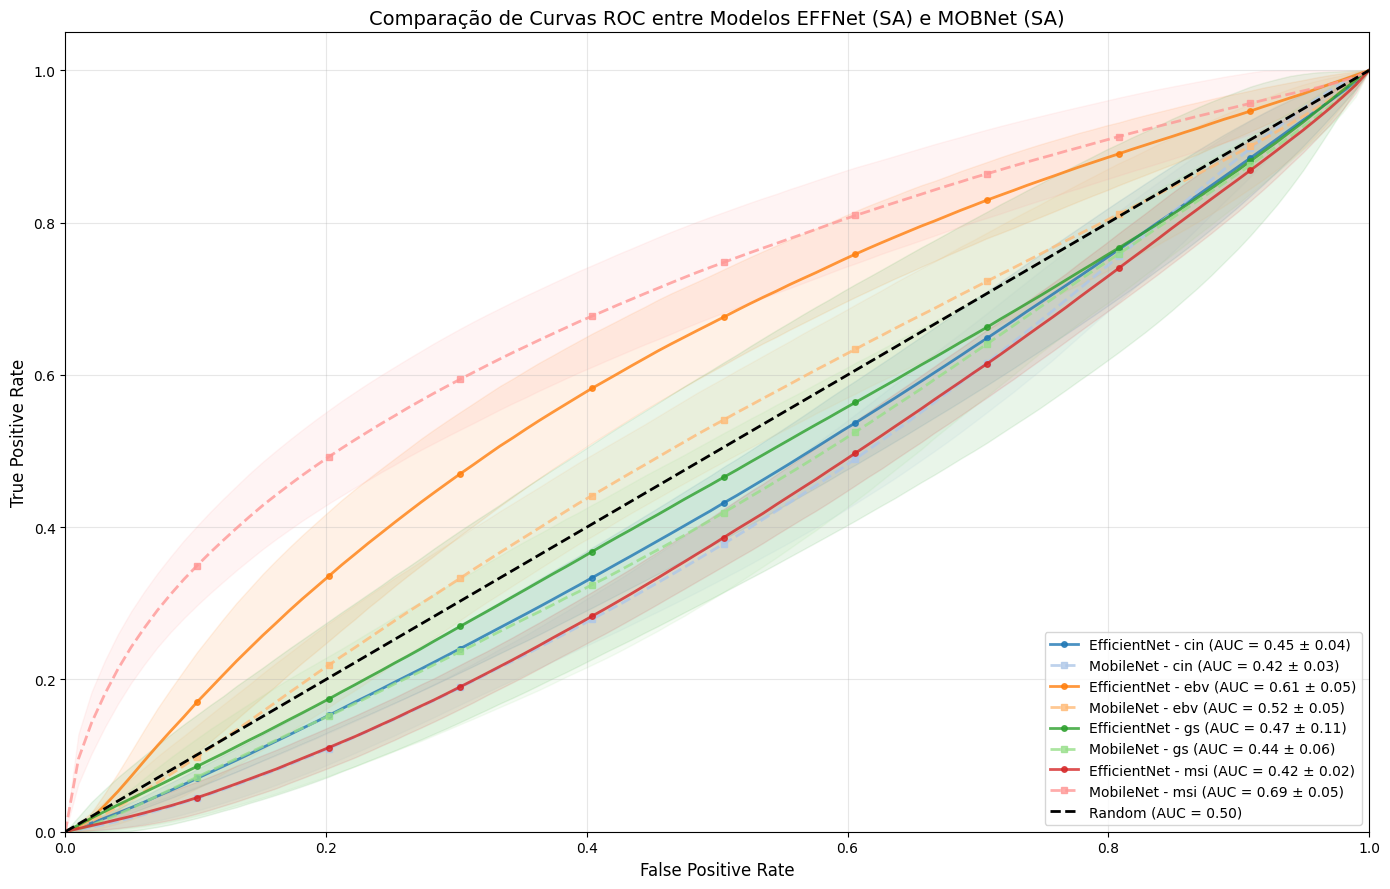

{'EfficientNet_cin': '#1f77b4',
 'MobileNet_cin': '#aec7e8',
 'EfficientNet_ebv': '#ff7f0e',
 'MobileNet_ebv': '#ffbb78',
 'EfficientNet_gs': '#2ca02c',
 'MobileNet_gs': '#98df8a',
 'EfficientNet_msi': '#d62728',
 'MobileNet_msi': '#ff9896'}

In [50]:
# Para comparar um modelo de múltiplos arquivos com um de arquivo único:
data1 = load_multiple_files(fold_files)
data2 = mob_table

models2 = ['m0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9']
plot_combined_roc_curves(data1, data2, format_type1='multi_file', format_type2='single_file', 
                        models2=models2, model_names=['EfficientNet', 'MobileNet'])


## **Para o modelo MA (ENSAMBLE)**

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import ast


In [22]:

# Carregar o arquivo CSV
ma_table = pd.read_csv('C:\\Users\\Fernando Alves\\Documents\\WANG PIPELINE\\Wang\\merged_table_tile_level_mob_shu_gg.csv')


In [23]:
# excluir coluna unnamed 0
ma_table = ma_table.drop(columns=["Unnamed: 0"], errors='ignore')



In [24]:
ma_table

,image_path,true_label,true_label_one_hot,predicted_label_m0,predicted_probability_m0,probability_vector_m0,probability_std_dev_m0,predicted_label_m1,predicted_probability_m1,probability_vector_m1,...,probability_vector_g7,probability_std_dev_g7,predicted_label_g8,predicted_probability_g8,probability_vector_g8,probability_std_dev_g8,predicted_label_g9,predicted_probability_g9,probability_vector_g9,probability_std_dev_g9
0,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",gs,0.756231,"{'cin': 0.2045, 'ebv': 0.0067, 'gs': 0.7562, '...",0.301999,msi,0.675514,"{'cin': 0.2304, 'ebv': 0.0432, 'gs': 0.0509, '...",...,"{'cin': 0.2466, 'ebv': 0.1488, 'gs': 0.555, 'm...",0.189364,cin,0.517613,"{'cin': 0.5176, 'ebv': 0.0869, 'gs': 0.135, 'm...",0.166999,cin,0.718211,"{'cin': 0.7182, 'ebv': 0.1659, 'gs': 0.0647, '...",0.273937
1,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.874059,"{'cin': 0.8741, 'ebv': 0.0256, 'gs': 0.0251, '...",0.360876,msi,0.387466,"{'cin': 0.354, 'ebv': 0.0301, 'gs': 0.2284, 'm...",...,"{'cin': 0.0633, 'ebv': 0.0438, 'gs': 0.8344, '...",0.337473,gs,0.698457,"{'cin': 0.1651, 'ebv': 0.1201, 'gs': 0.6985, '...",0.264468,cin,0.723046,"{'cin': 0.723, 'ebv': 0.2275, 'gs': 0.0325, 'm...",0.285429
2,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.798640,"{'cin': 0.7986, 'ebv': 0.0168, 'gs': 0.1421, '...",0.320198,gs,0.459887,"{'cin': 0.2525, 'ebv': 0.0268, 'gs': 0.4599, '...",...,"{'cin': 0.0349, 'ebv': 0.027, 'gs': 0.9288, 'm...",0.392005,ebv,0.487367,"{'cin': 0.3331, 'ebv': 0.4874, 'gs': 0.1256, '...",0.171142,cin,0.902306,"{'cin': 0.9023, 'ebv': 0.074, 'gs': 0.0132, 'm...",0.377463
3,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.963005,"{'cin': 0.963, 'ebv': 0.0104, 'gs': 0.0104, 'm...",0.411660,msi,0.543819,"{'cin': 0.2835, 'ebv': 0.0329, 'gs': 0.1398, '...",...,"{'cin': 0.025, 'ebv': 0.026, 'gs': 0.9436, 'ms...",0.400550,gs,0.670178,"{'cin': 0.2454, 'ebv': 0.04, 'gs': 0.6702, 'ms...",0.256392,cin,0.891575,"{'cin': 0.8916, 'ebv': 0.053, 'gs': 0.0497, 'm...",0.370885
4,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,gs,"[0, 0, 1, 0]",cin,0.882274,"{'cin': 0.8823, 'ebv': 0.0139, 'gs': 0.0771, '...",0.365807,cin,0.516469,"{'cin': 0.5165, 'ebv': 0.0491, 'gs': 0.0927, '...",...,"{'cin': 0.7691, 'ebv': 0.0773, 'gs': 0.0841, '...",0.299762,ebv,0.836537,"{'cin': 0.0965, 'ebv': 0.8365, 'gs': 0.0529, '...",0.339892,cin,0.700398,"{'cin': 0.7004, 'ebv': 0.2387, 'gs': 0.0202, '...",0.273683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179947,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.873058,"{'cin': 0.8731, 'ebv': 0.034, 'gs': 0.0154, 'm...",0.360431,msi,0.720836,"{'cin': 0.1183, 'ebv': 0.0914, 'gs': 0.0694, '...",...,"{'cin': 0.182, 'ebv': 0.7783, 'gs': 0.0208, 'm...",0.312146,msi,0.555803,"{'cin': 0.0426, 'ebv': 0.3986, 'gs': 0.003, 'm...",0.234335,ebv,0.987955,"{'cin': 0.0083, 'ebv': 0.988, 'gs': 0.0005, 'm...",0.426068
179948,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.615133,"{'cin': 0.6151, 'ebv': 0.0227, 'gs': 0.1079, '...",0.226496,msi,0.847759,"{'cin': 0.0305, 'ebv': 0.0353, 'gs': 0.0864, '...",...,"{'cin': 0.5198, 'ebv': 0.1422, 'gs': 0.0388, '...",0.181266,msi,0.930604,"{'cin': 0.0262, 'ebv': 0.0365, 'gs': 0.0067, '...",0.393092,ebv,0.762404,"{'cin': 0.2036, 'ebv': 0.7624, 'gs': 0.0044, '...",0.305617
179949,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.684742,"{'cin': 0.6847, 'ebv': 0.0186, 'gs': 0.0217, '...",0.271704,msi,0.820183,"{'cin': 0.099, 'ebv': 0.0315, 'gs': 0.0493, 'm...",...,"{'cin': 0.4701, 'ebv': 0.2162, 'gs': 0.1669, '...",0.129589,msi,0.731494,"{'cin': 0.0529, 'ebv': 0.2144, 'gs': 0.0012, '...",0.288897,ebv,0.948550,"{'cin': 0.0386, 'ebv': 0.9486, 'gs': 0.0014, '...",0.403537
179950,/mnt/efs-tcga/HEAL_Workspace/tiling_macenko/tr...,ebv,"[0, 1, 0, 0]",cin,0.896583,"{'cin': 

In [25]:

# Classes do problema
classes = ['cin', 'ebv', 'msi', 'gs']

# Identificar automaticamente todos os modelos presentes na tabela
# Procura por colunas que seguem o padrão 'predicted_label_*'
model_columns = [col for col in ma_table.columns if col.startswith('predicted_label_')]
models = list(set([col.split('_')[-1] for col in model_columns]))  # Extrai os identificadores únicos dos modelos
models.sort()  # Ordena os modelos

print(f"Modelos identificados: {models}")

# Listas para armazenar métricas de cada modelo
all_precision = []
all_recall = []
all_f1 = []
all_accuracy = []


Modelos identificados: ['g0', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'm0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 's0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9']


In [26]:
# Processar cada modelo identificado
for model in models:
    # Extrair rótulos verdadeiros e preditos para este modelo
    y_true = ma_table['true_label']
    y_pred = ma_table[f'predicted_label_{model}']
    
    # Calcular métricas para este modelo
    precision = precision_score(y_true, y_pred, labels=classes, average=None, zero_division=0)
    recall = recall_score(y_true, y_pred, labels=classes, average=None, zero_division=0)
    f1 = f1_score(y_true, y_pred, labels=classes, average=None, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    
    # Armazenar métricas
    all_precision.append(precision)
    all_recall.append(recall)
    all_f1.append(f1)
    all_accuracy.append(accuracy)

# Converter para arrays numpy para facilitar cálculos estatísticos
all_precision = np.array(all_precision)
all_recall = np.array(all_recall)
all_f1 = np.array(all_f1)
all_accuracy = np.array(all_accuracy)

# Calcular médias e desvios padrão
mean_precision = np.mean(all_precision, axis=0)
std_precision = np.std(all_precision, axis=0)

mean_recall = np.mean(all_recall, axis=0)
std_recall = np.std(all_recall, axis=0)

mean_f1 = np.mean(all_f1, axis=0)
std_f1 = np.std(all_f1, axis=0)

mean_accuracy = np.mean(all_accuracy)
std_accuracy = np.std(all_accuracy)

# Exibir resultados
print("=== RESULTADOS POR CLASSE ===")
for i, cls in enumerate(classes):
    print(f"\nClasse: {cls.upper()}")
    print(f"Precision: {mean_precision[i]:.4f} ± {std_precision[i]:.4f}")
    print(f"Recall:    {mean_recall[i]:.4f} ± {std_recall[i]:.4f}")
    print(f"F1-Score:  {mean_f1[i]:.4f} ± {std_f1[i]:.4f}")

print("\n=== RESULTADOS GLOBAIS ===")
print(f"Acurácia: {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"Número de modelos no ensemble: {len(models)}")

# Calcular também métricas médias (macro average)
print("\n=== MÉDIAS MACRO ===")
print(f"Precision (macro): {np.mean(mean_precision):.4f} ± {np.mean(std_precision):.4f}")
print(f"Recall (macro):    {np.mean(mean_recall):.4f} ± {np.mean(std_recall):.4f}")
print(f"F1-Score (macro):  {np.mean(mean_f1):.4f} ± {np.mean(std_f1):.4f}")

# Criar DataFrame com resultados para exportação
results_ma_table = pd.DataFrame({
    'Classe': classes,
    'Precision_Mean': mean_precision,
    'Precision_Std': std_precision,
    'Recall_Mean': mean_recall,
    'Recall_Std': std_recall,
    'F1_Mean': mean_f1,
    'F1_Std': std_f1
})

# Salvar resultados em CSV
results_ma_table.to_csv('metricas_ensemble_todos_modelos.csv', index=False)
print("\nResultados salvos em 'metricas_ensemble_todos_modelos.csv'")

=== RESULTADOS POR CLASSE ===

Classe: CIN
Precision: 0.6123 ± 0.0431
Recall:    0.6168 ± 0.1349
F1-Score:  0.6051 ± 0.0623

Classe: EBV
Precision: 0.3745 ± 0.1403
Recall:    0.3292 ± 0.1479
F1-Score:  0.3120 ± 0.1025

Classe: MSI
Precision: 0.4485 ± 0.0938
Recall:    0.2767 ± 0.1397
F1-Score:  0.3166 ± 0.1126

Classe: GS
Precision: 0.2714 ± 0.0867
Recall:    0.3384 ± 0.1521
F1-Score:  0.2718 ± 0.0647

=== RESULTADOS GLOBAIS ===
Acurácia: 0.4629 ± 0.0544
Número de modelos no ensemble: 30

=== MÉDIAS MACRO ===
Precision (macro): 0.4267 ± 0.0909
Recall (macro):    0.3903 ± 0.1436
F1-Score (macro):  0.3764 ± 0.0855

Resultados salvos em 'metricas_ensemble_todos_modelos.csv'


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import ast
import glob
import os

# Configurações
classes = ['cin', 'ebv', 'msi', 'gs']
base_path = 'C:\\Users\\Fernando Alves\\Documents\\WANG PIPELINE\\Wang\\'

# 1. Processar os arquivos do SA (EfficientNet)
sa_files = [
    os.path.join(base_path, "notebooks/summary_results_effnet/0618-231213_EFF-NET_fold0_results.csv"),
    os.path.join(base_path, "notebooks/summary_results_effnet/0618-231213_EFF-NET_fold1_results.csv"),
    os.path.join(base_path, "notebooks/summary_results_effnet/0618-231213_EFF-NET_fold2_results.csv"),
    os.path.join(base_path, "notebooks/summary_results_effnet/0618-231213_EFF-NET_fold3_results.csv"),
    os.path.join(base_path, "notebooks/summary_results_effnet/0618-231213_EFF-NET_fold4_results.csv"),
    os.path.join(base_path, "notebooks/summary_results_effnet/0618-231213_EFF-NET_fold5_results.csv"),
    os.path.join(base_path, "notebooks/summary_results_effnet/0618-231213_EFF-NET_fold6_results.csv"),
    os.path.join(base_path, "notebooks/summary_results_effnet/0618-231213_EFF-NET_fold7_results.csv"),
    os.path.join(base_path, "notebooks/summary_results_effnet/0618-231213_EFF-NET_fold8_results.csv"),
    os.path.join(base_path, "notebooks/summary_results_effnet/0618-231213_EFF-NET_fold9_results.csv")
]

# 2. Processar os arquivos do ensemble (merged tables)
ensemble_files = glob.glob(os.path.join(base_path, 'merged_table_tile_level_mob_shu_gg.csv'))

print(f"Arquivos SA encontrados: {len(sa_files)}")
print(f"Arquivos Ensemble encontrados: {len(ensemble_files)}")


Arquivos SA encontrados: 10
Arquivos Ensemble encontrados: 1


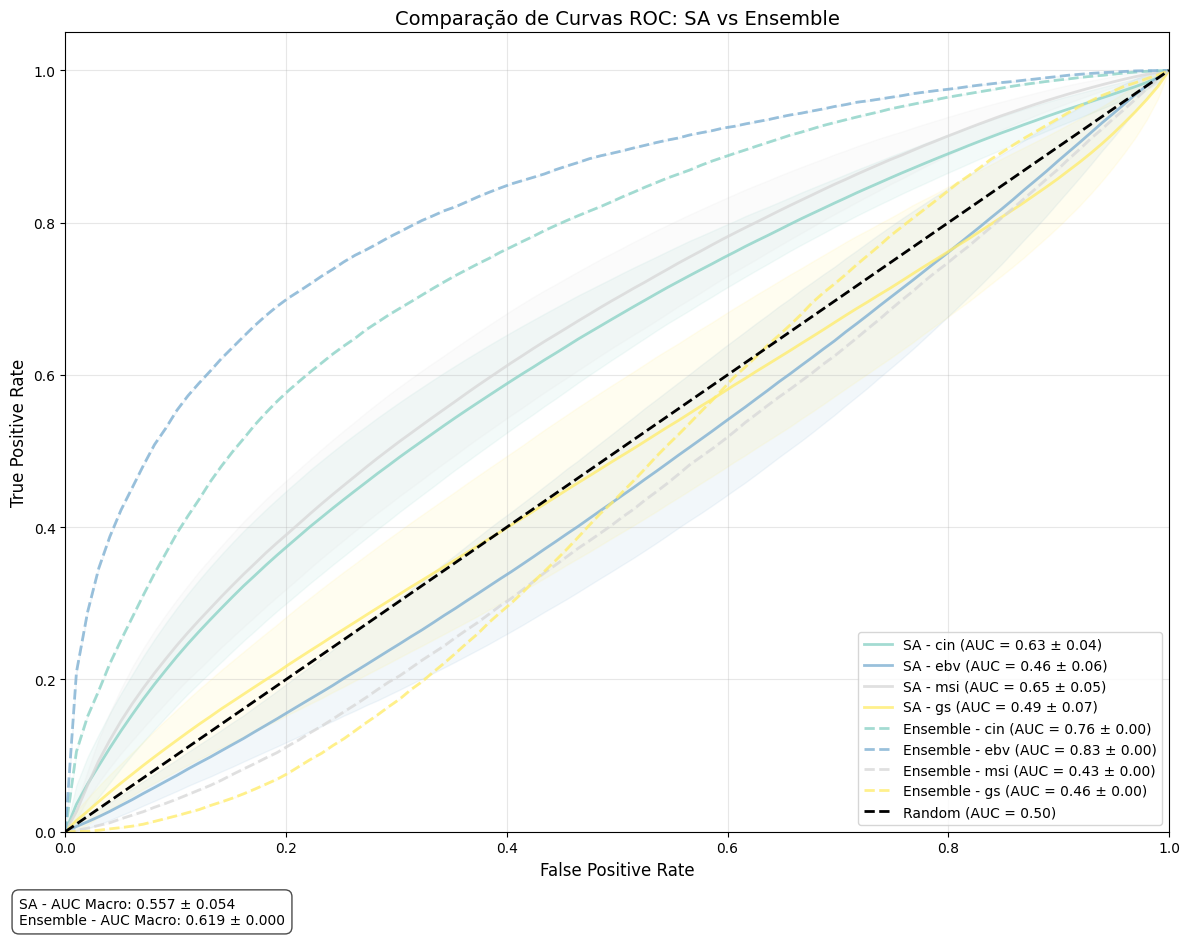

=== MÉTRICAS DETALHADAS ===

SA (EfficientNet):
  CIN: AUC = 0.630 ± 0.040
  EBV: AUC = 0.458 ± 0.060
  MSI: AUC = 0.649 ± 0.045
  GS: AUC = 0.490 ± 0.072
  Macro Average: 0.557 ± 0.054

Ensemble:
  CIN: AUC = 0.759 ± 0.000
  EBV: AUC = 0.825 ± 0.000
  MSI: AUC = 0.433 ± 0.000
  GS: AUC = 0.459 ± 0.000
  Macro Average: 0.619 ± 0.000

Dados das curvas ROC salvos em 'C:\Users\Fernando Alves\Documents\WANG PIPELINE\Wang\roc_curves_data.pkl'


In [52]:

# Função para calcular curvas ROC a partir de uma lista de dataframes
def calculate_roc_curves(data_list, format_type='sa'):
    """
    Calcula curvas ROC para uma lista de dataframes
    
    Parâmetros:
    -----------
    data_list : list
        Lista de DataFrames
    format_type : str
        'sa' para arquivos de fold do SA, 'ensemble' para merged tables
    """
    all_tprs = {cls: [] for cls in classes}
    all_aucs = {cls: [] for cls in classes}
    mean_fpr = np.linspace(0, 1, 100)
    
    for df in data_list:
        # Binarizar os rótulos verdadeiros
        y_test = label_binarize(df['true_label'], classes=classes)
        
        if format_type == 'sa':
            # Para arquivos SA: usar a coluna probability_vector
            prob_vectors = df['probability_vector'].apply(ast.literal_eval)
            y_score = np.array([list(prob_vec.values()) for prob_vec in prob_vectors])
        else:
            # Para ensemble: calcular a média das probabilidades de todos os modelos
            model_columns = [col for col in df.columns if col.startswith('probability_vector_')]
            all_model_probs = []
            
            for col in model_columns:
                prob_vectors = df[col].apply(ast.literal_eval)
                model_probs = np.array([list(prob_vec.values()) for prob_vec in prob_vectors])
                all_model_probs.append(model_probs)
            
            # Calcular a média das probabilidades de todos os modelos
            y_score = np.mean(all_model_probs, axis=0)
        
        # Calcular curva ROC para cada classe
        for i, cls in enumerate(classes):
            fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            
            # Interpolar para ter o mesmo número de pontos
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            
            all_tprs[cls].append(interp_tpr)
            all_aucs[cls].append(roc_auc)
    
    # Calcular média e desvio padrão para cada classe
    mean_tprs = {}
    std_tprs = {}
    mean_aucs = {}
    std_aucs = {}
    
    for cls in classes:
        mean_tprs[cls] = np.mean(all_tprs[cls], axis=0)
        mean_tprs[cls][-1] = 1.0
        std_tprs[cls] = np.std(all_tprs[cls], axis=0)
        mean_aucs[cls] = np.mean(all_aucs[cls])
        std_aucs[cls] = np.std(all_aucs[cls])
    
    return mean_fpr, mean_tprs, std_tprs, mean_aucs, std_aucs

# Carregar dados do SA
sa_data = []
for file in sa_files:
    file_path = os.path.join(base_path, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        sa_data.append(df)
    else:
        print(f"Arquivo não encontrado: {file_path}")

# Carregar dados do Ensemble
ensemble_data = []
for file in ensemble_files:
    df = pd.read_csv(file)
    ensemble_data.append(df)

# Calcular curvas ROC para SA
mean_fpr_sa, mean_tprs_sa, std_tprs_sa, mean_aucs_sa, std_aucs_sa = calculate_roc_curves(sa_data, 'sa')

# Calcular curvas ROC para Ensemble
mean_fpr_ensemble, mean_tprs_ensemble, std_tprs_ensemble, mean_aucs_ensemble, std_aucs_ensemble = calculate_roc_curves(ensemble_data, 'ensemble')

# Plotar as curvas ROC
plt.figure(figsize=(12, 10))
colors = plt.cm.Set3(np.linspace(0, 1, len(classes)))

# Plotar curvas para SA
for i, cls in enumerate(classes):
    plt.plot(mean_fpr_sa, mean_tprs_sa[cls], color=colors[i], 
             label=f'SA - {cls} (AUC = {mean_aucs_sa[cls]:.2f} ± {std_aucs_sa[cls]:.2f})', 
             lw=2, alpha=0.8)
    
    # Adicionar intervalo de confiança
    tprs_upper = np.minimum(mean_tprs_sa[cls] + std_tprs_sa[cls], 1)
    tprs_lower = np.maximum(mean_tprs_sa[cls] - std_tprs_sa[cls], 0)
    plt.fill_between(mean_fpr_sa, tprs_lower, tprs_upper, color=colors[i], alpha=.1)

# Plotar curvas para Ensemble (com linhas tracejadas)
for i, cls in enumerate(classes):
    plt.plot(mean_fpr_ensemble, mean_tprs_ensemble[cls], color=colors[i], linestyle='--',
             label=f'Ensemble - {cls} (AUC = {mean_aucs_ensemble[cls]:.2f} ± {std_aucs_ensemble[cls]:.2f})', 
             lw=2, alpha=0.8)
    
    # Adicionar intervalo de confiança
    tprs_upper = np.minimum(mean_tprs_ensemble[cls] + std_tprs_ensemble[cls], 1)
    tprs_lower = np.maximum(mean_tprs_ensemble[cls] - std_tprs_ensemble[cls], 0)
    plt.fill_between(mean_fpr_ensemble, tprs_lower, tprs_upper, color=colors[i], alpha=.1)

# Plotar linha de referência
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.50)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Comparação de Curvas ROC: SA vs Ensemble', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Adicionar métricas médias
mean_auc_sa = np.mean(list(mean_aucs_sa.values()))
mean_auc_ensemble = np.mean(list(mean_aucs_ensemble.values()))

plt.figtext(0.02, 0.02, 
            f"SA - AUC Macro: {mean_auc_sa:.3f} ± {np.mean(list(std_aucs_sa.values())):.3f}\n"
            f"Ensemble - AUC Macro: {mean_auc_ensemble:.3f} ± {np.mean(list(std_aucs_ensemble.values())):.3f}", 
            fontsize=10, 
            bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.7))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig(os.path.join(base_path, 'comparacao_roc_sa_vs_ensemble.png'), dpi=300, bbox_inches='tight')
plt.show()

# Exibir métricas detalhadas
print("=== MÉTRICAS DETALHADAS ===")
print("\nSA (EfficientNet):")
for cls in classes:
    print(f"  {cls.upper()}: AUC = {mean_aucs_sa[cls]:.3f} ± {std_aucs_sa[cls]:.3f}")

print(f"  Macro Average: {mean_auc_sa:.3f} ± {np.mean(list(std_aucs_sa.values())):.3f}")

print("\nEnsemble:")
for cls in classes:
    print(f"  {cls.upper()}: AUC = {mean_aucs_ensemble[cls]:.3f} ± {std_aucs_ensemble[cls]:.3f}")

print(f"  Macro Average: {mean_auc_ensemble:.3f} ± {np.mean(list(std_aucs_ensemble.values())):.3f}")

# Salvar dados das curvas ROC para análise posterior
roc_data = {
    'SA': {
        'mean_fpr': mean_fpr_sa,
        'mean_tprs': mean_tprs_sa,
        'std_tprs': std_tprs_sa,
        'mean_aucs': mean_aucs_sa,
        'std_aucs': std_aucs_sa
    },
    'Ensemble': {
        'mean_fpr': mean_fpr_ensemble,
        'mean_tprs': mean_tprs_ensemble,
        'std_tprs': std_tprs_ensemble,
        'mean_aucs': mean_aucs_ensemble,
        'std_aucs': std_aucs_ensemble
    }
}

import pickle
with open(os.path.join(base_path, 'roc_curves_data.pkl'), 'wb') as f:
    pickle.dump(roc_data, f)

print(f"\nDados das curvas ROC salvos em '{os.path.join(base_path, 'roc_curves_data.pkl')}'")